In [1]:
#Ejercicio 3 


#Librerias
from sympy import *
from sympy import symbols
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import sympy as sy


# Definimos los parámetros que vamos a usar

# Las dimensiones de las matrices
n = 100  
t = 150 
c =t/n
alpha =(1-c)/c
p3 = 0.3 #los pesos
p5 = 0.5
p7 = 0.7
rango = range(0,1000)#cuántas matrices

eigenvar_3=np.zeros((1000,n)) #Los repositorios de los eigenvalores
eigenvar_5=np.zeros((1000,n))
eigenvar_7=np.zeros((1000,n))

for i in rango:
    
    G = np.random.normal(0,np.sqrt(1),(n,n)) #La matriz GOE
    G = (1/2)*(G+G.T) #la hacemos simétrica
    
    H = np.random.normal(0,np.sqrt(1),(n,t)) #La Wishart
    W = H@H.T
  
    #Generamos las sumas ponderadas
    H3 = ((1-p3)*W)/n + (p3*G)/np.sqrt(n)
    H5 = ((1-p5)*W)/n + (p5*G)/np.sqrt(n)
    H7 = ((1-p7)*W)/n + (p7*G)/np.sqrt(n)
  
    #Sacamos los valores propios
    eig_3 = LA.eigh(H3)[0]
    eig_5 = LA.eigh(H5)[0]
    eig_7 = LA.eigh(H7)[0]
    
    eigenvar_3[i:] = eig_3
    eigenvar_5[i:] = eig_5
    eigenvar_7[i:] = eig_7
  

    valores_3 = eigenvar_3.flatten()
    valores_5 = eigenvar_5.flatten()
    valores_7 = eigenvar_7.flatten()


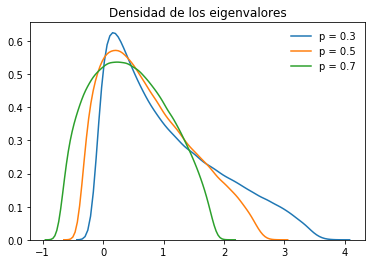

In [2]:
#Graficamos
sns.distplot(valores_3, hist = False, kde = True,label="p = 0.3")
sns.distplot(valores_5, hist = False, kde = True,label="p = 0.5")
sns.distplot(valores_7, hist = False, kde = True,label="p = 0.7")
plt.title("Densidad de los eigenvalores")
plt.legend(loc='upper right', frameon=False)
plt.show()